### Model evaluation. Confusion matrix and performance measures

Evaluem com de bo és un model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Dades/sms/SMSSpamCollection', header=None, sep='\t', names=['Label', 'SMS'])

In [3]:
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 1234)
X_train.shape, X_test.shape

((4457, 2), (1115, 2))

In [5]:
from nbc import NBCtext

In [6]:
_nbc = NBCtext()

In [7]:
_nbc.fit(X_train[['SMS', 'Label']])

In [8]:
X_test['predict'] = X_test.SMS.apply(lambda x: _nbc.predict(x, alpha = 1, soft = False))

In [9]:
pd.concat((X_test.groupby('Label').predict.value_counts(), X_test.groupby('Label').predict.value_counts(normalize = True)), axis = 1)

predict   predict
Label predict                   
ham   ham          957  0.994802
      spam           5  0.005198
spam  spam         141  0.921569
      ham           12  0.078431

En compte de medir ham/spam. Fem hard-desese i tenim aquesta taula: 
- sa: en predim 99% bé
- malalt: en predim 95% bé (tenim 5% que estan bé i els hi diguem que estan malament)

Altre model: 
- sa: en prediu 75% bé
- malalt: en prediu 99% bé

Millor el segon:
- És més dificil enganxar un malalt perquè n'hi ha menys.
- Al primer hi ha un 5% dels malalts que els deixem fora (no els hi diguem que estan malalts).
- El segon, a un sa li diguem que està malalt, però en realitat està sa (li hem de fer més proves). 

Conclusió:
- Mirant nomès aquestes dades, no n'hi ha prou, s'han d'interpretar les dades bé.

### Confusion Matrix for binary classification

<div>
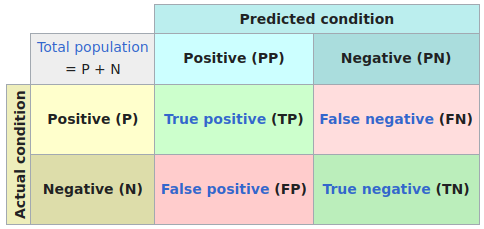
</div>


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [11]:
X_test.head(2)

,Label,SMS,predict
1537,ham,How's it feel? Mr. Your not my real Valentine ...,ham
963,ham,"Watching cartoon, listening music &amp; at eve...",ham


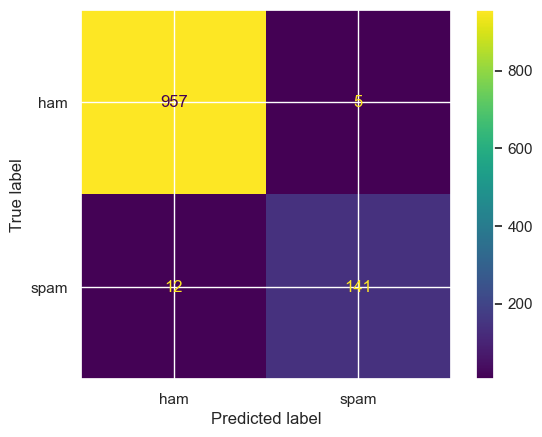

In [12]:
# Li passem el dataframe amb la columna original i el predict i mostra la figura.
ConfusionMatrixDisplay.from_predictions(X_test.Label, X_test.predict)

#### improved confusion matrix visualization

In [13]:
sns.set_theme(context = 'notebook', style = "white", font_scale = 1.0)

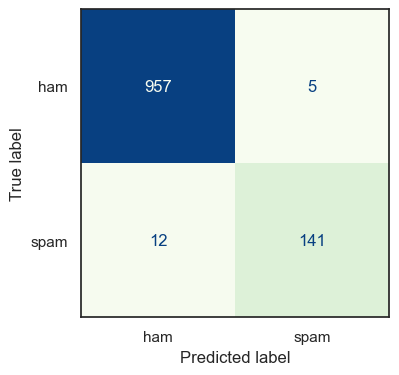

In [14]:
_, axs = plt.subplots(1, 1, figsize = (4, 4))
ConfusionMatrixDisplay.from_predictions(
    X_test.Label,
    X_test.predict,
    ax = axs,
    colorbar = False,
    cmap = 'GnBu'
);

#### A la diagonal hi han els que hem predit bé. I amb el color també mirem on hi ha el gruix dels predits.

###  Performance measures for binary classification

En un exemple binari nomès tenim: 
- Sa/hams (positiu) (P) de les files
- Negatiu/spam (negatiu) (N) de les files
- P de les columnes, va amb un barret a sobre i és la predicció.
- TP &rarr; true positive &rarr; l'hem predit bé a positiu
| |P|N|
|-|-|-|
|P|TP|FN|
|N|FP|TN|
- TP + FN + FP + TN = Nº observacions del set de test o 1 si ho fem amb proporcions

- **Accuracy**: proportion of correctly predicted examples,

$$Acc=\frac{TP+TN}{P+N}=\frac{TP+TN}{TP+FN+FP+TN}$$

## Accuracy:
Numero d'observacions que hem encertat, els dos que hem encertat dividit pel total que tenim.
- 1000 persones &rarr; 900 sans i 100 malalts. Fem el Acerteme el 90% dels sans i el 75% bé dels malalts
- Model: 
| |P|N|
|-|-|-|
|P(900p)|(810/1000=0.81)(810p)|0.09(90p)|
|N(100p)|0.025(25p)|0.075(75p)|
- Acc = 0.81 + 0.075 / 1 = 0.885
- Acc = 810 + 75 / 1000 = 0.885
- <hr/>
- Si evaluem el model a base del `acc = 0.885` &rarr; 89% com de significatiu és aquest 89%, aquest valor per si sol no diu res. El model no funciona un 89 de rendiment, perquè els malalts peta molt més d'això que diu. perque fa un promig dels que ha predit bé i dels que no. tens moltes errades. Els malalts no els estem predint amb aquest `acc`. sería millor dir el 90 i 75 inicials.
- Al fer un split train/test donarà diferent (diferents `acc`) podríem fer un promig, pero ho veurem més endavant: `cross-validation`.
- Nomès en fem 1, primer tenim el problema de dir com de bé funciona el model. Aquesta metrica `acc`, és una metrica però no diu tota la veritat. 
- Si tenim 25 dades, hauríem de donar 25 (90 i 75) i és dificil de digerir, ho hem de compactar. 
- El `acc` està amagant biaixos.
- Tenim altres mesures. 

#### Calculem l'accuracy:

In [15]:
X_test[X_test.Label == X_test.predict].count() /X_test.shape[0]

Label      0.984753
SMS        0.984753
predict    0.984753
dtype: float64

In [16]:
# Aquí el .Label es per fer-ho nomès per una columna.
X_test[X_test.Label == X_test.predict].Label.count() /X_test.shape[0]

0.9847533632286996

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(X_test.Label, X_test.predict)

0.9847533632286996

## Altres mesures: 

- **Presició** &rarr; les vegades que l'encerto, per les vegades que fem aquella predicció: 
    - Predicció positiva: TP / TP + FN
    - Prediccció negativa: TN / TN + FN
    - Cada columna tindría la seva presició
    - Última fila
    - Com predim
- **Recall** &rarr; de tots els positius que hi ha, quants sóc capaç de predir
    - Última columna
    - com de bé recuperem les etiquetes reals
    
| |P|N|recall|
|-|-|-|-|
|P(900p)|(810/1000=0.81)(810p)|0.09(90p)|TP / (TP+FN)|
|N(100p)|0.025(25p)|0.075(75p)|TN/(TN+FP)|
|precisió|(TP/(TP+FP)|(TN/(TN+FN)|(TP+TN)/(tots)|

- **El de baix a la dreta del tot és l'accuracy. el de sobre seu el recall i el de la esquerre la presició**


- **Recall**: fraction of positive examples correctly predicted as positives (it is a measure of *quantity*, also called **sensitivity** or **true positive rate**)

$$Recall=\frac{TP}{P}=\frac{TP}{TP+FN}$$

- **Precision**: fraction of predicted positive examples wich are actually positive (it is a measure of *quality* of the prediction)

$$Precision=\frac{TP}{PP}=\frac{TP}{TP+FP}$$

- **$F_1$ score**: An average measure of performance taking into account both, *Recall* and *Precision* (harmonic mean of *Recall* and *Precision*, ex. the harmonic mean is zero whenever $Precision=0$ or $Recall=0$ while a classifier with $Precision=1$ and $Recall=0$ has an arithmetic mean of 0.5). 

$$F_1=\frac{2\,Recall\,Precision}{Recall+Precision}=\frac{2\,TP}{2\,TP+FP+FN}$$

In [18]:
from sklearn.metrics import precision_recall_fscore_support as prf

- L'penultim és el `fscore` &rarr; per comprimir més aqeusta informació.
    - És la combinació: la mitja armonica del presicion i el recall. 
        - mitja aritmetica: la normal &rarr; suma numeros dividit per n. 
        - **mitja armonica**: invers de la mitja dels inversos &rarr; n/sum(1/Xi) &rarr; 1/((1/n)*sum(1/Xi)) 
            - &rarr; És la millor forma de reduir a un sol número tota la informació de la predicció, el recall i accuracy (està implicit amb tot això), encara que no es faci servir directament per calcular-lo.

- L'últim és com de balansejat està el model. Són els valors reals, que en el set de test tenim: **962 ham i 153 spam**

In [19]:
prf(X_test.Label, X_test.predict)

(array([0.9876161 , 0.96575342]),
 array([0.99480249, 0.92156863]),
 array([0.99119627, 0.94314381]),
 array([962, 153], dtype=int64))

El `fscore` és per positius i per negatius, en tenim dos (TP/(TP+FP)) / (TP/(TP+TN))

- **El macro-average:** és al recall (en tenim dos) dividit per dos. &rarr; a cada classe li donem el mateix pes. (Si tinguessim 500 i 500) estaría bé, però no és el cas. 
- **En el weightd:** cada un pesa la seva proporció
- **En el micro:** No el tenim amb compte encara  

##### Averaged performance measures

- **macro-average**

performance metrics are computed independently for each class and averaged afterwards (hence all classes have the same weight in the average)

In [20]:
prc, rcl, f1, sup = prf(X_test.Label, X_test.predict, average = 'macro')
print('+++ average performance measures')
print('Precision  %6.4f' %prc)
print('Recall     %6.4f' %rcl)
print('f_score    %6.4f' %f1)
print('Suppport   %s' %sup)

+++ average performance measures
Precision  0.9767
Recall     0.9582
f_score    0.9672
Suppport   None


- **micro-average**

performance metrics are computed by aggregating the contributions of all classes (hence preferable in case of class imbalance), in this case *recall*, *precision* and *$F_1$score* are all equal, i.e.

$$\text{microRecall}=\frac{\sum_c\,TP_c}{\sum_c\,P_c}\;\equiv\;\text{microPrecision}=\frac{\sum_c\,TP_c}{\sum_c\,PP_c}\;\equiv\;\text{micro}F_1$$

- **weighted-average**

performance metrics are computed by weighting the contributions of all classes (also preferable in case of class imbalance), e.g.

$$\text{microRecall}=\sum_c\frac{n_c}{n}\,\frac{TP_c}{P_c}\,,\; \text{microPrecision}=\sum_c\frac{n_c}{n}\,\frac{TP_c}{PP_c}$$

In [21]:
avrgs = ['macro', 'micro', 'weighted']
pd.DataFrame([prf(X_test.Label, X_test.predict, average = mode)[:3] for mode in avrgs], columns = ['precision', 'recall', 'f-score'], index = avrgs)

,precision,recall,f-score
macro,0.976685,0.958186,0.967170
micro,0.984753,0.984753,0.984753
weighted,0.984616,0.984753,0.984603
